In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

acciona_ene = df[df['empresa'] == 'Acciona Energia']

acciona_ene.shape

(684, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

acciona_ene = acciona_ene [['date','open','high','low','close','adj close']]

acciona_ene.shape

(684, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

acciona_ene['date'] = pd.to_datetime(acciona_ene['date'], format="%Y-%m-%d")

acciona_ene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1316 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       684 non-null    datetime64[ns]
 1   open       684 non-null    float64       
 2   high       684 non-null    float64       
 3   low        684 non-null    float64       
 4   close      684 non-null    float64       
 5   adj close  684 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 37.4 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

acciona_ene.sort_values(by='date',ascending= True, inplace=True)

acciona_ene.head()

,date,open,high,low,close,adj close
1534,2021-07-05,29.500000,29.50,28.549999,29.000000,28.145775
1533,2021-07-06,29.100000,29.10,28.500000,28.790001,27.941961
1532,2021-07-07,28.790001,29.50,28.520000,29.500000,28.631046
1531,2021-07-08,29.480000,29.90,29.059999,29.900000,29.019264
1530,2021-07-09,29.950001,30.75,29.629999,30.600000,29.698645


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-07-05'
fecha_fin = '2024-03-01'

acciona_ene = acciona_ene[(acciona_ene['date'] >= fecha_inicio) & (acciona_ene['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

acciona_ene.shape

(684, 6)

In [8]:
# Paso 8: Transformar serie temporal en ramdon forest

acciona_ene_rfr = acciona_ene[['date','close']]

acciona_ene_rfr

,date,close
1534,2021-07-05,29.000000
1533,2021-07-06,28.790001
1532,2021-07-07,29.500000
1531,2021-07-08,29.900000
1530,2021-07-09,30.600000
...,...,...
1540,2024-02-26,19.690001
1541,2024-02-27,19.969999
1542,2024-02-28,19.559999
1543,2024-02-29,19.100000


In [9]:
acciona_ene_rfr.close = acciona_ene_rfr.close.round(2)

acciona_ene_rfr

,date,close
1534,2021-07-05,29.00
1533,2021-07-06,28.79
1532,2021-07-07,29.50
1531,2021-07-08,29.90
1530,2021-07-09,30.60
...,...,...
1540,2024-02-26,19.69
1541,2024-02-27,19.97
1542,2024-02-28,19.56
1543,2024-02-29,19.10


In [10]:
new_df = pd.DataFrame(columns=['d-4', 'd-3', 'd-2', 'd-1', 'do'])

new_df

,d-4,d-3,d-2,d-1,do


In [11]:
for i in range(len(new_df.columns)):
    new_df[new_df.columns[i]] = acciona_ene_rfr['close'].shift(-i)

In [12]:
new_df

,d-4,d-3,d-2,d-1,do
1534,29.00,28.79,29.50,29.90,30.60
1533,28.79,29.50,29.90,30.60,30.54
1532,29.50,29.90,30.60,30.54,30.45
1531,29.90,30.60,30.54,30.45,30.33
1530,30.60,30.54,30.45,30.33,30.00
...,...,...,...,...,...
1540,19.69,19.97,19.56,19.10,19.79
1541,19.97,19.56,19.10,19.79,NaN
1542,19.56,19.10,19.79,NaN,NaN
1543,19.10,19.79,NaN,NaN,NaN


In [13]:
new_df.dropna(axis=0,inplace=True)

In [14]:
new_df.reset_index(drop=True, inplace=True)

new_df

,d-4,d-3,d-2,d-1,do
0,29.00,28.79,29.50,29.90,30.60
1,28.79,29.50,29.90,30.60,30.54
2,29.50,29.90,30.60,30.54,30.45
3,29.90,30.60,30.54,30.45,30.33
4,30.60,30.54,30.45,30.33,30.00
...,...,...,...,...,...
675,20.84,20.60,20.28,19.78,19.69
676,20.60,20.28,19.78,19.69,19.97
677,20.28,19.78,19.69,19.97,19.56
678,19.78,19.69,19.97,19.56,19.10


In [15]:
new_df.dropna()

,d-4,d-3,d-2,d-1,do
0,29.00,28.79,29.50,29.90,30.60
1,28.79,29.50,29.90,30.60,30.54
2,29.50,29.90,30.60,30.54,30.45
3,29.90,30.60,30.54,30.45,30.33
4,30.60,30.54,30.45,30.33,30.00
...,...,...,...,...,...
675,20.84,20.60,20.28,19.78,19.69
676,20.60,20.28,19.78,19.69,19.97
677,20.28,19.78,19.69,19.97,19.56
678,19.78,19.69,19.97,19.56,19.10


In [16]:
from sklearn.ensemble import RandomForestRegressor as RFR 

rfr=RFR()

In [17]:
# Paso : Separar X e y para los modelos

X = new_df.drop('do',axis=1)

y = new_df.do

In [18]:
from sklearn.model_selection import train_test_split as tts   


X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size=0.8,
                                       test_size=0.2,
                                       random_state=42
                                      )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((544, 4), (136, 4), (544,), (136,))

In [19]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
rfr.predict(X_test)[:10]

array([24.0824, 27.8764, 27.8396, 39.7522, 30.1249, 25.3134, 38.3268,
       30.0825, 23.755 , 31.848 ])

In [21]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio


y_pred=rfr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

0.6308626034341903

In [22]:
from sklearn.linear_model import OrthogonalMatchingPursuit as OMP

omp= OMP()


In [23]:
omp.fit(X_train, y_train)

OrthogonalMatchingPursuit()

In [24]:
omp.predict(X_test)[:10]

array([24.1794713 , 27.7736265 , 27.58393498, 40.13352691, 30.39935656,
       25.23775033, 38.97541023, 30.12979492, 23.74018566, 31.30787912])

In [25]:
y_pred=omp.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

0.6207608569188193

In [26]:
new_df_1 = new_df[['d-4','d-3','d-2','d-1']]

new_df_1

,d-4,d-3,d-2,d-1
0,29.00,28.79,29.50,29.90
1,28.79,29.50,29.90,30.60
2,29.50,29.90,30.60,30.54
3,29.90,30.60,30.54,30.45
4,30.60,30.54,30.45,30.33
...,...,...,...,...
675,20.84,20.60,20.28,19.78
676,20.60,20.28,19.78,19.69
677,20.28,19.78,19.69,19.97
678,19.78,19.69,19.97,19.56


In [27]:
y_pred=omp.predict(new_df_1)

pred = pd.DataFrame(y_pred)

pred

,0
0,29.910152
1,30.609016
2,30.549113
3,30.459259
4,30.339454
...,...
675,19.806582
676,19.716729
677,19.996274
678,19.586940


In [28]:
new_df['pred'] = pred

In [29]:
new_df

,d-4,d-3,d-2,d-1,do,pred
0,29.00,28.79,29.50,29.90,30.60,29.910152
1,28.79,29.50,29.90,30.60,30.54,30.609016
2,29.50,29.90,30.60,30.54,30.45,30.549113
3,29.90,30.60,30.54,30.45,30.33,30.459259
4,30.60,30.54,30.45,30.33,30.00,30.339454
...,...,...,...,...,...,...
675,20.84,20.60,20.28,19.78,19.69,19.806582
676,20.60,20.28,19.78,19.69,19.97,19.716729
677,20.28,19.78,19.69,19.97,19.56,19.996274
678,19.78,19.69,19.97,19.56,19.10,19.586940


In [30]:
new_df.rename(columns={'do': 'real'}, inplace=True)



In [31]:
new_df['error'] = new_df.pred - new_df.real



In [32]:
acciona_ene_rfr.reset_index(drop=True, inplace=True)

In [33]:
inicio_indice = 0
fin_indice = 679
acciona_rfr = acciona_ene_rfr.loc[inicio_indice:fin_indice]

In [34]:
acciona_rfr

,date,close
0,2021-07-05,29.00
1,2021-07-06,28.79
2,2021-07-07,29.50
3,2021-07-08,29.90
4,2021-07-09,30.60
...,...,...
675,2024-02-20,20.84
676,2024-02-21,20.60
677,2024-02-22,20.28
678,2024-02-23,19.78


In [35]:
new_df['date'] = acciona_ene_rfr.date


In [36]:
new_df

,d-4,d-3,d-2,d-1,real,pred,error,date
0,29.00,28.79,29.50,29.90,30.60,29.910152,-0.689848,2021-07-05
1,28.79,29.50,29.90,30.60,30.54,30.609016,0.069016,2021-07-06
2,29.50,29.90,30.60,30.54,30.45,30.549113,0.099113,2021-07-07
3,29.90,30.60,30.54,30.45,30.33,30.459259,0.129259,2021-07-08
4,30.60,30.54,30.45,30.33,30.00,30.339454,0.339454,2021-07-09
...,...,...,...,...,...,...,...,...
675,20.84,20.60,20.28,19.78,19.69,19.806582,0.116582,2024-02-20
676,20.60,20.28,19.78,19.69,19.97,19.716729,-0.253271,2024-02-21
677,20.28,19.78,19.69,19.97,19.56,19.996274,0.436274,2024-02-22
678,19.78,19.69,19.97,19.56,19.10,19.586940,0.486940,2024-02-23


In [37]:
new_df.insert(0, 'date', new_df.pop('date'))

In [38]:
new_df

,date,d-4,d-3,d-2,d-1,real,pred,error
0,2021-07-05,29.00,28.79,29.50,29.90,30.60,29.910152,-0.689848
1,2021-07-06,28.79,29.50,29.90,30.60,30.54,30.609016,0.069016
2,2021-07-07,29.50,29.90,30.60,30.54,30.45,30.549113,0.099113
3,2021-07-08,29.90,30.60,30.54,30.45,30.33,30.459259,0.129259
4,2021-07-09,30.60,30.54,30.45,30.33,30.00,30.339454,0.339454
...,...,...,...,...,...,...,...,...
675,2024-02-20,20.84,20.60,20.28,19.78,19.69,19.806582,0.116582
676,2024-02-21,20.60,20.28,19.78,19.69,19.97,19.716729,-0.253271
677,2024-02-22,20.28,19.78,19.69,19.97,19.56,19.996274,0.436274
678,2024-02-23,19.78,19.69,19.97,19.56,19.10,19.586940,0.486940


In [39]:
import matplotlib.pyplot as plt

In [40]:
new_df.error = new_df.error.astype(int)

In [41]:
new_df

,date,d-4,d-3,d-2,d-1,real,pred,error
0,2021-07-05,29.00,28.79,29.50,29.90,30.60,29.910152,0
1,2021-07-06,28.79,29.50,29.90,30.60,30.54,30.609016,0
2,2021-07-07,29.50,29.90,30.60,30.54,30.45,30.549113,0
3,2021-07-08,29.90,30.60,30.54,30.45,30.33,30.459259,0
4,2021-07-09,30.60,30.54,30.45,30.33,30.00,30.339454,0
...,...,...,...,...,...,...,...,...
675,2024-02-20,20.84,20.60,20.28,19.78,19.69,19.806582,0
676,2024-02-21,20.60,20.28,19.78,19.69,19.97,19.716729,0
677,2024-02-22,20.28,19.78,19.69,19.97,19.56,19.996274,0
678,2024-02-23,19.78,19.69,19.97,19.56,19.10,19.586940,0


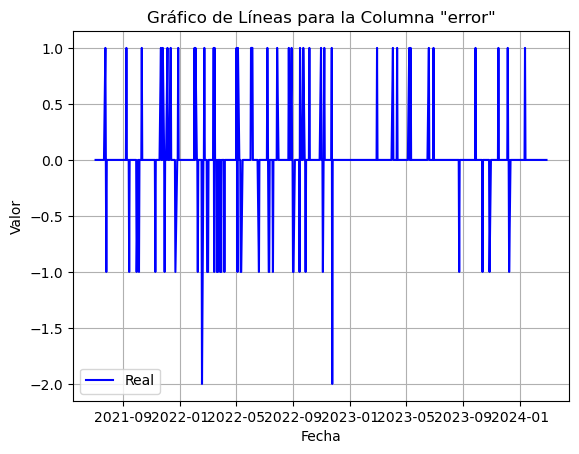

In [42]:
error_data = new_df['error']


# Crear un gráfico de líneas
plt.plot(new_df['date'], error_data, marker='None', linestyle='-', color='b', label='Real')

# Configuración del gráfico
plt.title('Gráfico de Líneas para la Columna "error"')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
condiciones = [
    (new_df['error'] == 0),
    (new_df['error'] >= 1),
    (new_df['error'] <= -1)
]

categorias = [0, 1, 2]

new_df['cate'] = np.select(condiciones, categorias, default=None)

In [47]:
new_df.pred = new_df.pred.round(2)

new_df

,date,d-4,d-3,d-2,d-1,real,pred,error,cate
0,2021-07-05,29.00,28.79,29.50,29.90,30.60,29.91,0,0
1,2021-07-06,28.79,29.50,29.90,30.60,30.54,30.61,0,0
2,2021-07-07,29.50,29.90,30.60,30.54,30.45,30.55,0,0
3,2021-07-08,29.90,30.60,30.54,30.45,30.33,30.46,0,0
4,2021-07-09,30.60,30.54,30.45,30.33,30.00,30.34,0,0
...,...,...,...,...,...,...,...,...,...
675,2024-02-20,20.84,20.60,20.28,19.78,19.69,19.81,0,0
676,2024-02-21,20.60,20.28,19.78,19.69,19.97,19.72,0,0
677,2024-02-22,20.28,19.78,19.69,19.97,19.56,20.00,0,0
678,2024-02-23,19.78,19.69,19.97,19.56,19.10,19.59,0,0


In [45]:
catg = new_df[['date','d-4','d-3','d-2','d-1','real','cate']]

In [46]:
catg.to_csv('acciona_ene_class.csv',index=False)